In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np
import keras
from keras import layers


In [15]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

--2021-02-08 18:40:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 172.217.203.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-02-08 18:40:13 (81.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [16]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
predictors.shape

(15462, 10)

In [5]:
# max_sequence_len demonstrates the max number of words in sentence
max_sequence_len-1

10

In [6]:
corpus[:15]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,']

In [17]:

model = keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(layers.Bidirectional(layers.LSTM(128)))
# model.add(layers.LSTM(128))
model.add(layers.Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')


In [10]:
# if return_sequences=True then the timesteps 
# (or in other words number of words in a sentence/each word is considered as a timestep/number of timesteps)
#is returned to the next layer

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 256)           234496    
_________________________________________________________________
dense_1 (Dense)              (None, 10, 3211)          825227    
Total params: 1,380,823
Trainable params: 1,380,823
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              825227    
Total params: 1,380,823
Trainable params: 1,380,823
Non-trainable params: 0
_________________________________________________________________


In [19]:
# where does the 484 in each epoch come from?
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 12s 24ms/step - loss: 6.8862 - accuracy: 0.0232
Epoch 2/100
484/484 [==============================] - 11s 23ms/step - loss: 6.4269 - accuracy: 0.0316
Epoch 3/100
484/484 [==============================] - 11s 24ms/step - loss: 6.1952 - accuracy: 0.0407
Epoch 4/100
484/484 [==============================] - 12s 25ms/step - loss: 5.9527 - accuracy: 0.0490
Epoch 5/100
484/484 [==============================] - 12s 24ms/step - loss: 5.6800 - accuracy: 0.0592
Epoch 6/100
484/484 [==============================] - 11s 24ms/step - loss: 5.3673 - accuracy: 0.0711
Epoch 7/100
484/484 [==============================] - 12s 24ms/step - loss: 5.0306 - accuracy: 0.0865
Epoch 8/100
484/484 [==============================] - 11s 23ms/step - loss: 4.6664 - accuracy: 0.1090
Epoch 9/100
484/484 [==============================] - 11s 24ms/step - loss: 4.3056 - accuracy: 0.1484
Epoch 10/100
484/484 [==============================] - 12s 24ms/step - l

484/484 [==============================] - 11s 23ms/step - loss: 0.5237 - accuracy: 0.8496
Epoch 80/100
484/484 [==============================] - 11s 24ms/step - loss: 0.5216 - accuracy: 0.8503
Epoch 81/100
484/484 [==============================] - 12s 24ms/step - loss: 0.5231 - accuracy: 0.8489
Epoch 82/100
484/484 [==============================] - 11s 24ms/step - loss: 0.5222 - accuracy: 0.8508
Epoch 83/100
484/484 [==============================] - 12s 24ms/step - loss: 0.5220 - accuracy: 0.8488
Epoch 84/100
484/484 [==============================] - 12s 24ms/step - loss: 0.5157 - accuracy: 0.8517
Epoch 85/100
484/484 [==============================] - 11s 24ms/step - loss: 0.5238 - accuracy: 0.8504
Epoch 86/100
484/484 [==============================] - 12s 24ms/step - loss: 0.5195 - accuracy: 0.8494
Epoch 87/100
484/484 [==============================] - 11s 24ms/step - loss: 0.5213 - accuracy: 0.8507
Epoch 88/100
484/484 [==============================] - 11s 23ms/step - loss:

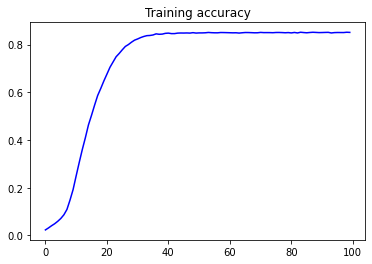

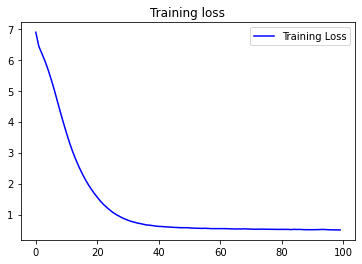

In [20]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


In [21]:

#outcome of the seed text without - with learning rate chosen for Adam optimizer 
seed_text = "love thy foe as thy sweet not cruel"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

love thy foe as thy sweet not cruel do show thee thence thee composed forth thee to your desire you sing than ' me with me tongue with dearest fresh account prevent hue night bosom's blushing place confounding pretty prick'd dreaming on crave tired to me so pride to give those wear me with time have tillage dead sacred use sight with nature's example hid end favour with example survive thou wilt well should know composed thence away cause assured me long born art one is my sight with rolling can sit composed ruin'd shame dead new unseeing pied on time must have lie mars the themes of


The generated text is starting to get cohesive as the mdoel generated words fitting to the foe context.

The accuracy did not improve much after 50 epochs. Maybe that's all the capacity of the network.